In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Data\archive\Retail_Data_Transactions.csv')

In [3]:
df.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [4]:
# check date type
df.dtypes

customer_id    object
trans_date     object
tran_amount     int64
dtype: object

In [5]:
# convert 'trans_date' to datetime
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [6]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
dtype: object

In [ ]:
# build R,F, M


In [7]:
# Identify the oldest and most recent transaction dates
print(df['trans_date'].min(), df['trans_date'].max())

2011-05-16 00:00:00 2015-03-16 00:00:00


In [8]:
# suppose the project started in June 1,2015 
R_today = dt.datetime(2015, 6, 1)
df['R_diff']=(R_today - df['trans_date']).dt.days # calculate days different
df.head()
              

,customer_id,trans_date,tran_amount,R_diff
0,CS5295,2013-02-11,35,840
1,CS4768,2015-03-15,39,78
2,CS2122,2013-02-26,52,825
3,CS1217,2011-11-16,99,1293
4,CS1850,2013-11-20,78,558


In [9]:
R = df.groupby(by=['customer_id'])['R_diff'] # group by customerID
R = R.agg([('R_diff','min')])# every customer_id recent transaction
R.head()

,R_diff
customer_id,
CS1112,138
CS1113,112
CS1114,109
CS1115,88
CS1116,280


In [11]:
# build F, M
F = df.groupby(by=['customer_id'])['customer_id'].agg([('F_fre','count')])
M = df.groupby(by=['customer_id'])['tran_amount'].agg([('M_sum',sum)])
RFM = R.join(F).join(M)
RFM.head()

,R_diff,F_fre,M_sum
customer_id,,,
CS1112,138,15,1012
CS1113,112,20,1490
CS1114,109,19,1432
CS1115,88,22,1659
CS1116,280,13,857


C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

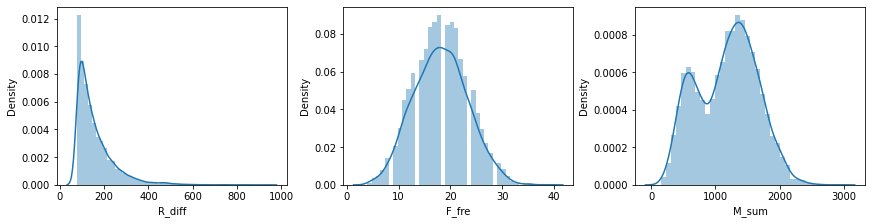

In [12]:
# Examine the statistical distributions

fig,ax = plt.subplots(1,3,constrained_layout= True,figsize = (12,3))
ax1 = sns.distplot(RFM['R_diff'], ax=ax[0])
ax2 = sns.distplot(RFM['F_fre'], ax=ax[1])
ax3 = sns.distplot(RFM['M_sum'],ax =ax[2])

In [13]:
# assign score according 1-4
RFM.describe()

,R_diff,F_fre,M_sum
count,6889.000000,6889.000000,6889.000000
mean,157.538249,18.144869,1179.269705
std,85.382526,5.193014,465.832609
min,77.000000,4.000000,149.000000
25%,99.000000,14.000000,781.000000
50%,130.000000,18.000000,1227.000000
75%,188.000000,22.000000,1520.000000
max,934.000000,39.000000,2933.000000


In [14]:
# computing Quantile of RFM values
RFM['R_score']= pd. qcut(RFM['R_diff'], 5, [1,2,3,4,5])
RFM['F_score']= pd. qcut(RFM['F_fre'], 5, [1,2,3,4,5])
RFM['M_score']= pd. qcut(RFM['M_sum'], 5, [1,2,3,4,5])
RFM.head()

,R_diff,F_fre,M_sum,R_score,F_score,M_score
customer_id,,,,,,
CS1112,138,15,1012,3,2,2
CS1113,112,20,1490,2,4,4
CS1114,109,19,1432,2,3,4
CS1115,88,22,1659,1,4,5
CS1116,280,13,857,5,1,2


In [15]:
RFM['RFM_Score']= RFM['R_score'].astype(str)+RFM['F_score'].astype(str)+RFM['M_score'].astype(str)
RFM.head()

,R_diff,F_fre,M_sum,R_score,F_score,M_score,RFM_Score
customer_id,,,,,,,
CS1112,138,15,1012,3,2,2,322
CS1113,112,20,1490,2,4,4,244
CS1114,109,19,1432,2,3,4,234
CS1115,88,22,1659,1,4,5,145
CS1116,280,13,857,5,1,2,512


In [16]:
# Filter out Top custoemr
RFM[RFM['RFM_Score']=='555'].sort_values('M_sum', ascending = False).head()

,R_diff,F_fre,M_sum,R_score,F_score,M_score,RFM_Score
customer_id,,,,,,,
CS3799,228,36,2513,5,5,5,555
CS2951,274,32,2382,5,5,5,555
CS1215,210,35,2362,5,5,5,555
CS2620,219,35,2360,5,5,5,555
CS1580,267,33,2329,5,5,5,555


In [39]:
# seperate into 10 bins
bins = RFM.RFM_Score.quantile(q=np.linspace(0,1,num=11),interpolation='nearest')
labels = ['Hibernating','Cant lose them','At risk','About to sleep','Needs attention','Promising','recent customers','Potential loyalist','Loyal customers','Champions']
RFM['types'] = pd.cut(RFM['RFM_Score'], bins=bins, labels=labels, include_lowest=True)
RFM.head()

,R_diff,F_fre,M_sum,R_score,F_score,M_score,RFM_Score,types
customer_id,,,,,,,,
CS1112,138,15,1012,3,2,2,322,Needs attention
CS1113,112,20,1490,2,4,4,244,About to sleep
CS1114,109,19,1432,2,3,4,234,About to sleep
CS1115,88,22,1659,1,4,5,145,Cant lose them
CS1116,280,13,857,5,1,2,512,Loyal customers


In [40]:
import csv # save to backup
RFM.to_csv('RFM.csv', index = False)

In [ ]:
# statistic number of customers in each type and plot it

In [43]:
table = RFM.reset_index().dropna()
table1 = table.pivot_table('customer_id', index = 'types', aggfunc='count')
table1=table1.rename(columns={'customer_id':'number_of_customers'}).reset_index()
table1

,types,number_of_customers
0,Hibernating,721
1,Cant lose them,724
2,At risk,660
3,About to sleep,673
4,Needs attention,713
5,Promising,661
6,recent customers,683
7,Potential loyalist,680
8,Loyal customers,752
9,Champions,622


Text(0.5, 1.0, 'customer types distribution')

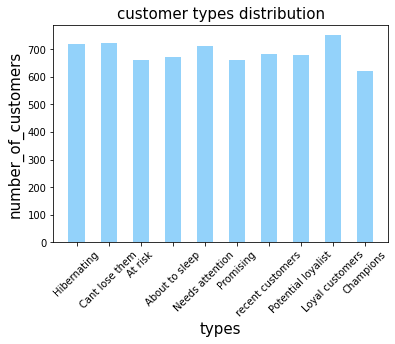

In [67]:
%matplotlib inline
from pylab import *
plt.xticks(range(10),table1['types'], rotation =45) # set label to number

#set position
n =10

X= np.arange(n)
plt.bar(X, table1['number_of_customers'],alpha=0.9,width = 0.5,facecolor = 'lightskyblue',lw=2)

plt.xlabel('types',fontsize =15)
plt.ylabel('number_of_customers', fontsize=15)
plt.title('customer types distribution',fontsize =15)

In [68]:
import matplotlib as mpl

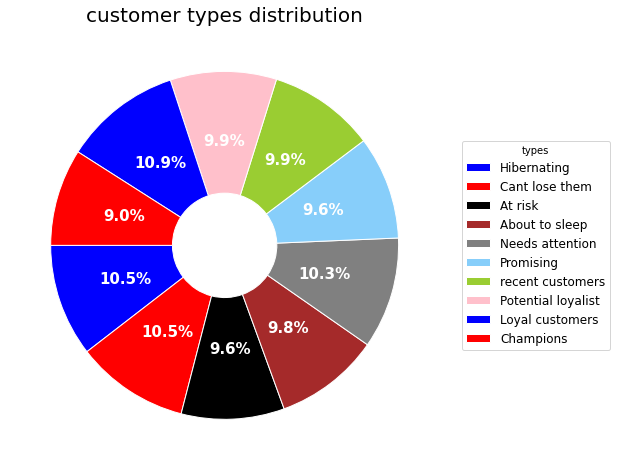

In [90]:
plt.figure(figsize =(10,8))

labels = ['Hibernating','Cant lose them','At risk','About to sleep','Needs attention','Promising','recent customers','Potential loyalist','Loyal customers','Champions']
data = table1['number_of_customers']
colors = ['blue', 'red', 'black', 'brown', 'gray', 'lightskyblue', 'yellowgreen', 'pink']

wedges, texts, autotexts = plt.pie(data,
                                    autopct = '%3.1f%%',
                                    radius = 1,
                                    pctdistance = 0.6,
                                    colors = colors,
                                    startangle = 180,
                                    textprops = {'color': 'w'},
                                    wedgeprops = {'width': 0.7, 'edgecolor': 'w'}
                                  )
                                   
plt.legend(wedges,
          labels,
          fontsize = 12,
          title = 'types',
          loc = 'center right',
          bbox_to_anchor = (1.4, 0.5))

# set text
plt.setp(autotexts, size=15, weight='bold')
plt.setp(texts, size=15)

# set title
plt.title('customer types distribution', fontsize=20)

plt.show()
